In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")

#Loading Data
train_data = pd.read_csv('../DATA/Train.csv')

c:\Users\pravin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
# DataFrame Values
print("Number of Rows : ",train_data.shape[0])
print("Number of Columns : ",train_data.shape[1])
print("Column Names : ",train_data.columns.values)

Number of Rows :  1490
Number of Columns :  3
Column Names :  ['ArticleId' 'Text' 'Category']


In [4]:
# Data Points per Category
train_data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [5]:
# Removing rows with missing values
train_data.dropna(inplace=True)
train_data.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [6]:
target_category = train_data['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


<AxesSubplot:xlabel='News Categories', ylabel='Data Points Per Category'>

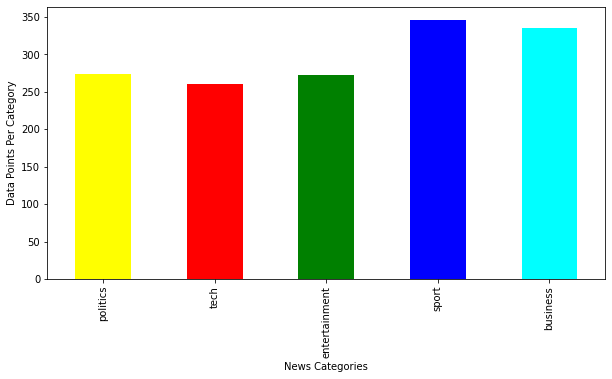

In [7]:
# Plotting data points per category
news_cat = train_data['Category'].value_counts()
my_colors = ['yellow', 'red', 'green', 'blue', 'cyan', 'magenta']
news_cat.sample(frac=1).plot(kind='bar', figsize=(10,5), xlabel="News Categories", ylabel="Data Points Per Category", color=my_colors)

In [8]:
train_data["Text"] = train_data["Text"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [9]:
import nltk
from nltk.corpus import stopwords

print(len(stopwords.words('english')))
# print(stopwords.words('english'))

179


In [10]:
import warnings
import re

stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        total_text = re.sub('\s+',' ', total_text)
        total_text = total_text.lower()
        
        for word in total_text.split():
            if not word in stop_words and len(word) >= 3:
                string += word + " "
        df[column][index] = string

In [ ]:
# Preprocessing the data

for index, row in train_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', train_data)

train_data.head()

In [20]:

result = pd.DataFrame([[]])
for col in train_data:
    result[col] = train_data[col].astype(str).apply(len).mean()

print(result)

   ArticleId         Text  Category
0   3.513423  1447.000671  7.518792


<Figure size 1080x504 with 0 Axes>

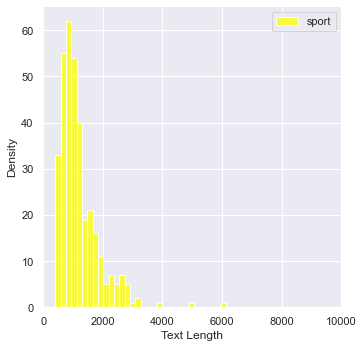

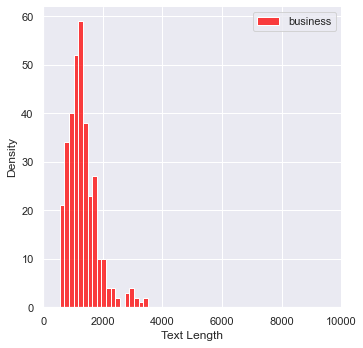

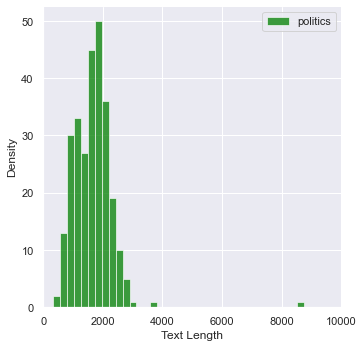

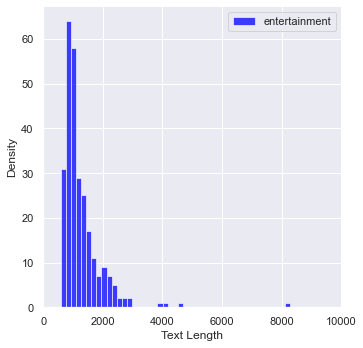

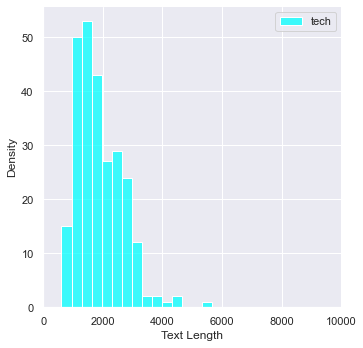

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap = ['yellow', 'red', 'green', 'blue', 'cyan']
labels = train_data['Category'].value_counts().index

for label, color in zip(labels, cmap):
    sns.displot(train_data[train_data['Category'] == label]['Text'].str.len(), color=color, label=label)
    plt.legend()
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.xlim(0, 10000)


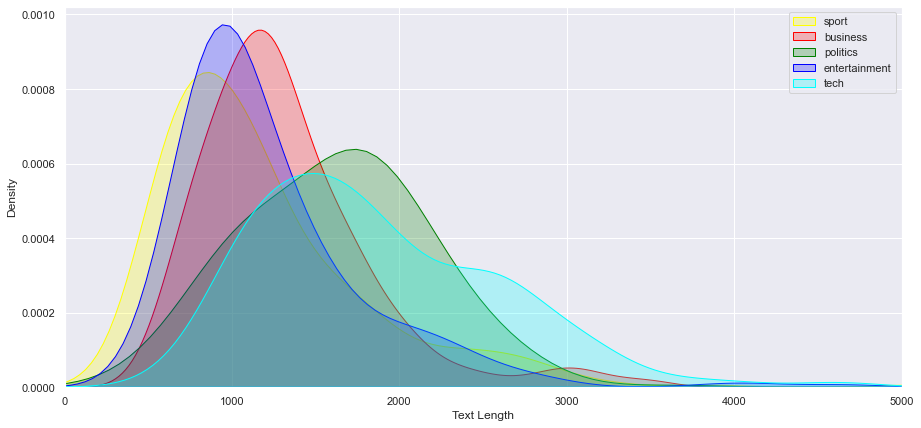

In [13]:
sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap = ['yellow', 'red', 'green', 'blue', 'cyan']
labels = train_data['Category'].value_counts().index

for label,color in zip(labels, cmap):
    sns.kdeplot(train_data[train_data['Category'] == label]['Text'].str.len(), color=color, fill=True, label=label)
    plt.legend()
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.xlim(0, 5000)

In [14]:
import itertools
import collections

lemmatized_tokens = list(train_data['Text'].str.split(' '))

for word in lemmatized_tokens:
    if len(word) < 3:
        lemmatized_tokens.remove(word)
counts = collections.Counter(lemmatized_tokens)
clean_articles = pd.DataFrame(counts.most_common(20), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))

clean_articles.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Common Words Found in News Articles")
plt.show()

TypeError: unhashable type: 'list'